In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [3]:
!kaggle competitions download -c 2021-ml-midterm-p3

  0% 0.00/2.26k [00:00<?, ?B/s]
100% 2.26k/2.26k [00:00<00:00, 3.00MB/s]
  0% 0.00/215k [00:00<?, ?B/s]
100% 215k/215k [00:00<00:00, 70.7MB/s]
  0% 0.00/97.7k [00:00<?, ?B/s]
100% 97.7k/97.7k [00:00<00:00, 31.4MB/s]


In [6]:
train=pd.read_csv('train.csv', index_col=0)
test=pd.read_csv('test.csv', index_col=0)
sample=pd.read_csv('sample_submit.csv', index_col=0)

In [7]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,label
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,5,13,9,1,0,0,0,0,13,15,10,15,5,0,0,3,15,2,0,11,8,0,0,4,12,0,0,8,8,0,0,5,8,0,0,9,8,0,0,4,11,0,1,12,7,0,0,2,14,5,10,12,0,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,0,11,16,9,0,0,0,0,3,15,16,6,0,0,0,7,15,16,16,2,0,0,0,0,1,16,16,3,0,0,0,0,1,16,16,6,0,0,0,0,1,16,16,6,0,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,3,16,15,14,0,0,0,0,8,13,8,16,0,0,0,0,1,6,15,11,0,0,0,1,8,13,15,1,0,0,0,9,16,16,5,0,0,0,0,3,13,16,16,11,5,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,13,6,15,4,0,0,0,2,1,13,13,0,0,0,0,0,2,15,11,1,0,0,0,0,0,1,12,12,1,0,0,0,0,0,1,10,8,0,0,0,8,4,5,14,9,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,0,7,8,0,0,0,0,0,1,13,6,2,2,0,0,0,7,15,0,9,8,0,0,5,16,10,0,16,6,0,0,4,15,16,13,16,1,0,0,0,0,3,15,10,0,0,0,0,0,2,16,4,0,0,4


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1437 non-null   int64
 1   1       1437 non-null   int64
 2   2       1437 non-null   int64
 3   3       1437 non-null   int64
 4   4       1437 non-null   int64
 5   5       1437 non-null   int64
 6   6       1437 non-null   int64
 7   7       1437 non-null   int64
 8   8       1437 non-null   int64
 9   9       1437 non-null   int64
 10  10      1437 non-null   int64
 11  11      1437 non-null   int64
 12  12      1437 non-null   int64
 13  13      1437 non-null   int64
 14  14      1437 non-null   int64
 15  15      1437 non-null   int64
 16  16      1437 non-null   int64
 17  17      1437 non-null   int64
 18  18      1437 non-null   int64
 19  19      1437 non-null   int64
 20  20      1437 non-null   int64
 21  21      1437 non-null   int64
 22  22      1437 non-null   int64
 23  23      1437 

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 23 to 1790
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       360 non-null    float64
 1   1       360 non-null    float64
 2   2       360 non-null    float64
 3   3       360 non-null    float64
 4   4       360 non-null    float64
 5   5       360 non-null    float64
 6   6       360 non-null    float64
 7   7       360 non-null    float64
 8   8       360 non-null    float64
 9   9       360 non-null    float64
 10  10      360 non-null    float64
 11  11      360 non-null    float64
 12  12      360 non-null    float64
 13  13      360 non-null    float64
 14  14      360 non-null    float64
 15  15      360 non-null    float64
 16  16      360 non-null    float64
 17  17      360 non-null    float64
 18  18      360 non-null    float64
 19  19      360 non-null    float64
 20  20      360 non-null    float64
 21  21      360 non-null    float64
 22  

In [10]:
train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', 'label'],
      dtype='object')

느낌이 뭔가 knn이 잘 될거 같은 느낌임..
전처리를 할 수 있나..?

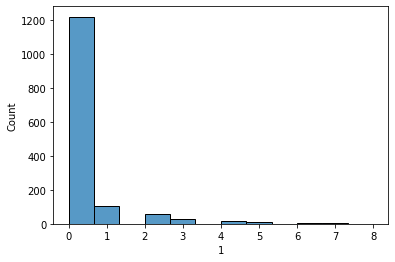

In [ ]:
sns.histplot(train,x='1')

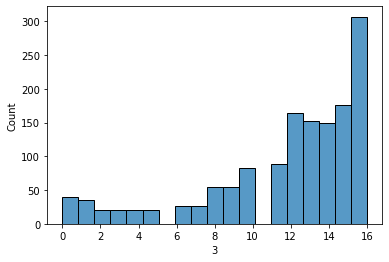

In [12]:
sns.histplot(train,x='3')

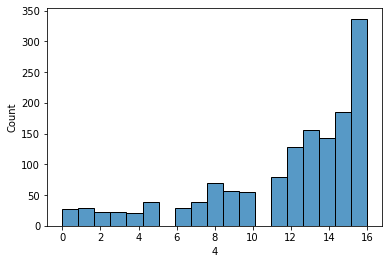

In [13]:
sns.histplot(train,x='4')

스케일링을 진행해야겠다. 

In [11]:
X_train=train.drop('label',axis=1)
y_train=train['label']
X_test=test

In [15]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaled_X_train=sc.fit_transform(X_train)
scaled_X_test=sc.transform(X_test)


## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(scaled_X_train,y_train)

y_train_pred=knn.predict(scaled_X_train)
y_test_pred=knn.predict(scaled_X_test)

In [27]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred))

0.9867780097425192


In [28]:
knn_sample=sample.copy()
knn_sample['label']=y_test_pred
knn_sample.to_csv('knn.csv')

## 랜덤포레스트

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

y_train_pred=rf_clf.predict(X_train)
y_test_pred=rf_clf.predict(X_test)

In [43]:
print(accuracy_score(y_train,y_train_pred))

1.0


In [44]:
rf_sample=sample.copy()
rf_sample['label']=y_test_pred
rf_sample.to_csv('rf2.csv')

In [35]:
rf_clf1=RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=8,
                               min_samples_split=8,random_state=0)
rf_clf1.fit(scaled_X_train,y_train)

y_train_pred=rf_clf1.predict(scaled_X_train)
y_test_pred=rf_clf1.predict(scaled_X_test)

In [37]:
rf1_sample=sample.copy()
rf1_sample['label']=y_test_pred
rf1_sample.to_csv('rf1.csv')

## XGBoost

In [32]:
from xgboost import XGBClassifier

xgb_clf=XGBClassifier()
xgb_clf.fit(scaled_X_train,y_train)

y_train_pred=xgb_clf.predict(scaled_X_train)
y_test_pred=xgb_clf.predict(scaled_X_test)

In [33]:
print(accuracy_score(y_train,y_train_pred))

1.0


In [34]:
xgb_sample=sample.copy()
xgb_sample['label']=y_test_pred
xgb_sample.to_csv('xgb.csv')

In [38]:
xgb_clf=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_clf.fit(scaled_X_train,y_train)

y_test_pred=xgb_clf.predict(scaled_X_test)

In [39]:
xgb1_sample=sample.copy()
xgb1_sample['label']=y_test_pred
xgb1_sample.to_csv('xgb1.csv')

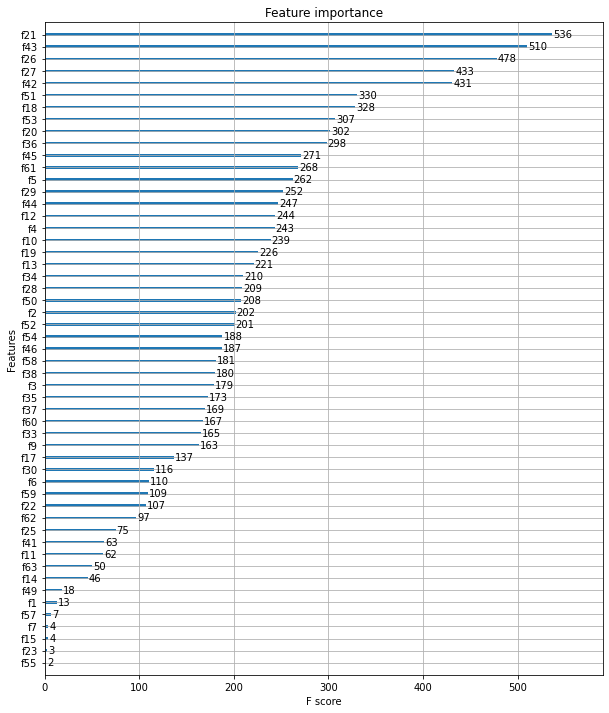

In [40]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
#사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_clf,ax=ax)

In [45]:

xgb_clf=XGBClassifier()
xgb_clf.fit(X_train,y_train)

y_train_pred=xgb_clf.predict(X_train)
y_test_pred=xgb_clf.predict(X_test)

In [46]:
xgb_sample=sample.copy()
xgb_sample['label']=y_test_pred
xgb_sample.to_csv('xgb2.csv')

## 로지스틱 회귀

In [53]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()
lr_clf.fit(scaled_X_train,y_train)

train_pred=lr_clf.predict(scaled_X_train)
test_pred=lr_clf.predict(scaled_X_test)

print(accuracy_score(y_train,train_pred))

0.9986082115518441


In [54]:
lr1_sample=sample.copy()
lr1_sample['label']=test_pred
lr1_sample.to_csv('lr1.csv')

In [50]:
from sklearn.model_selection import GridSearchCV

params={
    'penalty':['l1','l2'],
    'C':[0.01,0.1,0.5,1]
}

grid_clf=GridSearchCV(lr_clf,param_grid=params,scoring='accuracy',cv=3)
grid_clf.fit(scaled_X_train,y_train)
print('최적의 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적의 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.931


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [51]:
lr_clf=LogisticRegression(C=1,penalty='l2')
lr_clf.fit(scaled_X_train,y_train)

train_pred=lr_clf.predict(scaled_X_train)
test_pred=lr_clf.predict(scaled_X_test)

print(accuracy_score(y_train,train_pred))

0.9986082115518441


In [52]:
lr_sample=sample.copy()
lr_sample['label']=test_pred
lr_sample.to_csv('lr.csv')

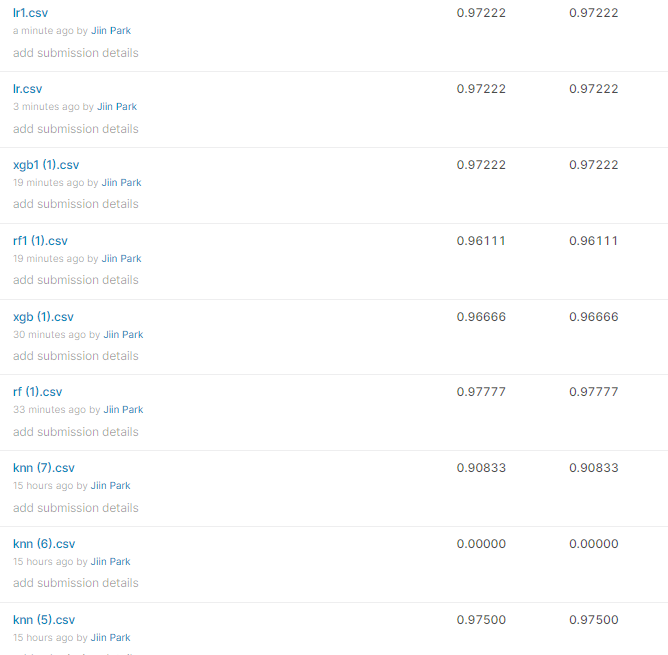